## Effect of batch size notebook

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [15]:
series = 27
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader1 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node')
results = loader1.result_processing()
key_config_df = loader1.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,27,testing static trace,1,True
1,2,6-mlserver-mock,mock-one,0,4,8Gi,5,1,40,60,27,testing static trace,1,True
2,3,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,27,testing static trace,1,False
3,4,6-mlserver-mock,mock-one,0,4,8Gi,5,1,40,60,27,testing static trace,1,False
4,5,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,27,none-containerized,1,True
5,6,6-mlserver-mock,mock-one,0,4,8Gi,1,1,40,60,27,none-containerized,1,True


In [16]:
results.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [17]:
configs = loader1.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1', '5'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0'],
    'no-engine': True,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 27,
    'series_meta': 'testing static trace',
    'timeout': 60,
    'workload_config': {'load_duration': 60, 'loads_to_test': [40]},
    'workload_type': 'static'}
File name: 1.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1', '5'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 27,
    'series_meta': 'testing static trace',
    'timeout': 120,
    'workload_config': {'load_duration': 60, 'loads_to_test': [40]},
    'workload_t

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,40,0.012820,39.684879,0.008744,5.260688
1,0,5,4,40,0.027751,86.566000,0.016976,2.891343
2,0,1,4,40,0.015098,42.623593,0.008774,5.376315
3,0,5,4,40,0.030280,91.443592,0.017221,6.398355
4,0,1,4,40,0.010834,2.955121,0.007297,2.430512
5,0,1,4,40,0.029637,4.477815,0.016160,1.296368


Text(0, 0.5, 'Latency (seconds)')

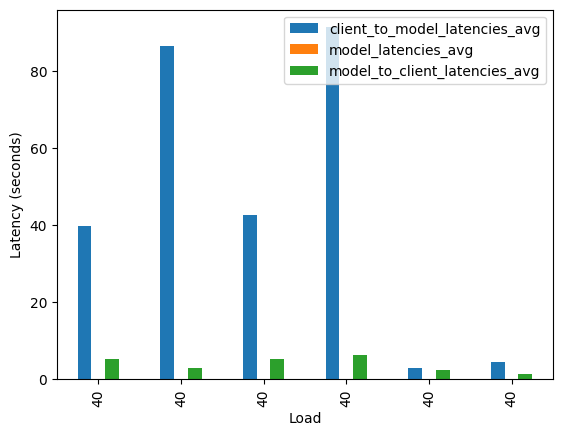

In [18]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [26]:
logs = loader1._read_logs()
len(logs['4']['to_svc_logs'])

4800

In [20]:
# experiment_id = 3
# a = pd.DataFrame(logs[str(experiment_id)]['to_svc_logs'])
# b = pd.DataFrame(logs[str(experiment_id)]['to_model_logs'])

In [21]:
# to_svc_logs = a['ts'].to_list()
# to_svc_logs.sort()
# to_model_logs = b['ts'].to_list()
# to_model_logs.sort()

In [9]:
# pd.set_option('display.float_format', '{:.10f}'.format)
# pd.DataFrame({'to_svc_logs': to_svc_logs, 'to_model_logs': to_model_logs})

In [10]:
loader2 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node_with_log')

In [11]:
loader1.result_processing()

excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!
excepted-1!


,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,6,4.477815,6.860035,4.745638,2.488923,7.123182,0.778055,0.016160,0.029637,0.015633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,91.443592,175.820389,92.177657,2536.191138,178.828643,0.841061,0.017221,0.030280,0.016567,...,1.130951e+09,3.726316e+16,1.136894e+09,444194816.0,7.952970,10.322026,8.877779,6.039798,10.883100,2.260427
2,1,39.684879,75.781120,40.106222,468.177474,76.951714,0.120308,0.008744,0.012820,0.008694,...,1.115378e+09,1.615774e+17,1.123398e+09,4403200.0,9.501128,17.781513,9.512376,29.748380,17.815126,0.148630
3,3,42.623593,80.941103,43.104522,531.932731,82.295004,0.258446,0.008774,0.015098,0.008737,...,1.129820e+09,9.255743e+16,1.133928e+09,443101184.0,9.428378,17.246387,9.499000,29.264673,17.260504,0.193572
4,5,2.955121,4.243694,3.204429,0.813070,4.318462,0.182999,0.007297,0.010834,0.007316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,86.566000,168.289603,86.762225,2349.558417,170.081247,0.797930,0.016976,0.027751,0.016571,...,1.054573e+09,4.792065e+16,1.062994e+09,442380288.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
loader2.result_processing()

excepted-1!
excepted-1!
excepted-1!
excepted-1!


,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,4,91.443592,175.820389,92.177657,2536.191138,178.828643,0.841061,0.017221,0.030280,0.016567,...,1.130951e+09,3.726316e+16,1.136894e+09,444194816.0,7.952970,10.322026,8.877779,6.039798,10.883100,2.260427
1,3,42.623593,80.941103,43.104522,531.932731,82.295004,0.258446,0.008774,0.015098,0.008737,...,1.129820e+09,9.255743e+16,1.133928e+09,443101184.0,9.428378,17.246387,9.499000,29.264673,17.260504,0.193572
